In [1]:
import networkx as nx
import csv
import time
import pandas as pd
from cdlib import algorithms, readwrite, evaluation, NodeClustering
from cdlib.benchmark import LFR, SBM, GRP
import infomap
from collections import defaultdict
import matplotlib.pyplot as plt
from tqdm import tqdm
import numpy as np
from pathlib import Path
import pickle
import os

In [2]:
def averageDegree(graph):
    degrees = [val for (node, val) in graph.degree()]
    sum = 0
    for d in degrees:
        sum += d
    return sum/len(degrees)

In [3]:
def kin(graph):
    nodes = graph.nodes()
    sum = 0
    for n in nodes:
        sum += graph.in_degree(n)
    return sum/len(nodes)

In [4]:
def kout(graph):
    nodes = graph.nodes()
    sum = 0
    for n in nodes:
        sum += graph.out_degree(n)
    return sum/len(nodes)

In [21]:
def APL(graph):
    largestComponent = 0
    largestAPL = 0
    for C in (graph.subgraph(c) for c in nx.weakly_connected_components(graph)):
        if largestComponent<len(C.nodes):
            largestComponent = len(C.nodes)
            apl = nx.average_shortest_path_length(C)
            print(len(C.nodes), " ", apl)
            largestAPL = apl
    return largestAPL

In [6]:
def transcriptionFactors(graph):
    sourceNodes = []
    for e in graph.edges():
        sourceNodes.append(e[0])
    return len(set(sourceNodes))

In [7]:
def targetGenes(graph):
    targetNodes = []
    for e in graph.edges():
        targetNodes.append(e[1])
    return len(set(targetNodes))

In [8]:
def networkInfo(graph):
    print("Transcription Factors:", transcriptionFactors(graph))
    print("Target Genes:", targetGenes(graph))
    print("Average degree:", averageDegree(graph))
    print("Internal average degree:", kin(graph))
    print("External average degree:", kout(graph))
    print("Clustering coefficient:", nx.average_clustering(graph))
    print("Average Path Length (highest value):", APL(graph))

In [9]:
def txtToNetworkx(fileName):
    raw = pd.read_csv(fileName, sep="\t", usecols=[0,2], header=None)
    raw.columns = ['Source', 'Target']
    network = nx.from_pandas_edgelist(raw, source='Source', target='Target', edge_attr=None, create_using=nx.DiGraph())  
    network.name = fileName.split(".")[0]
    return network

In [10]:
def plotDegreeDistribution(graph):
    fig = plt.figure(figsize=(6*1.61803398875, 6))
    ax = plt.axes((0.2, 0.2, 0.70, 0.70), facecolor='w')
    d = np.array(nx.degree_histogram(graph))
    y = d / len(graph.nodes)
    x = np.arange(len(y))
    ax.plot(x,y,"go")
    ax.set_xlabel("k")
    ax.set_ylabel("Pk")
    ax.set_yscale('log')
    ax.set_xscale('log')
    ax.set_title("Degree distribution")
    #ax.legend()
    fig.savefig(("DegreeDistribution_%s.png" % (graph.name)))
    plt.close(fig)

In [11]:
ScNet = txtToNetworkx('Sc_net.txt')
print(ScNet)
CaNet = txtToNetworkx('Ca_net.txt')
print(CaNet)
YlNet = txtToNetworkx('Yl_net.txt')
print(YlNet)
CpNet = txtToNetworkx('Cp_net.txt')
print(CpNet)
CgNet = txtToNetworkx('Cg_net.txt')
print(CgNet)
CtNet = txtToNetworkx('Ct_net.txt')
print(CtNet)
KpNet = txtToNetworkx('Kp_net.txt')
print(KpNet)
KlNet = txtToNetworkx('Kl_net.txt')
print(KlNet)
ZbNet = txtToNetworkx('Zb_net.txt')
print(ZbNet)
KmNet = txtToNetworkx('Km_net.txt')
print(KmNet)

DiGraph named 'Sc_net' with 6886 nodes and 195498 edges
DiGraph named 'Ca_net' with 6015 nodes and 35687 edges
DiGraph named 'Yl_net' with 5288 nodes and 9238 edges
DiGraph named 'Cp_net' with 3381 nodes and 6986 edges
DiGraph named 'Cg_net' with 2133 nodes and 3508 edges
DiGraph named 'Ct_net' with 665 nodes and 698 edges
DiGraph named 'Kp_net' with 561 nodes and 581 edges
DiGraph named 'Kl_net' with 111 nodes and 126 edges
DiGraph named 'Zb_net' with 32 nodes and 31 edges
DiGraph named 'Km_net' with 4 nodes and 3 edges


## Sc 

In [12]:
networkInfo(ScNet)

Transcription Factors: 220
Target Genes: 6886
Average degree: 56.781295381934356
Internal average degree: 28.390647690967178
External average degree: 28.390647690967178
Clustering coefficient: 0.47292986866503783
0.059118487596843794
Average Path Length (highest value): 0.059118487596843794


## Ca 

In [22]:
networkInfo(CaNet)

Transcription Factors: 118
Target Genes: 6015
Average degree: 11.86600166251039
Internal average degree: 5.933000831255195
External average degree: 5.933000831255195
Clustering coefficient: 0.27748432380066496
6015   0.033561147568944835
Average Path Length (highest value): 0.033561147568944835


In [24]:
plotDegreeDistribution(CaNet)

## Yl 

In [134]:
networkInfo(YlNet)

Transcription Factors: 5
Target Genes: 5288
Average degree: 3.493948562783661
Internal average degree: 1.7469742813918305
External average degree: 1.7469742813918305
Clustering coefficient: 0.36379908022118507
0.0009717910543001173
Average Path Length (highest value): 0.0009717910543001173


## Cp 

In [133]:
networkInfo(CpNet)

Transcription Factors: 11
Target Genes: 3380
Average degree: 4.132505175983437
Internal average degree: 2.0662525879917184
External average degree: 2.0662525879917184
Clustering coefficient: 0.24723282938034807
0.00291718951537394
Average Path Length (highest value): 0.00291718951537394


## Cg

In [23]:
networkInfo(CgNet)

Transcription Factors: 40
Target Genes: 2116
Average degree: 3.2892639474917957
Internal average degree: 1.6446319737458979
External average degree: 1.6446319737458979
Clustering coefficient: 0.045236801428956815
2129   0.001647275186557281
Average Path Length (highest value): 0.001647275186557281


## Ct

In [26]:
networkInfo(CtNet)

Transcription Factors: 16
Target Genes: 663
Average degree: 2.099248120300752
Internal average degree: 1.049624060150376
External average degree: 1.049624060150376
Clustering coefficient: 0.007634087729790835
665   0.0406060331551771
Average Path Length (highest value): 0.0406060331551771


## Kp 

In [130]:
networkInfo(KpNet)

Transcription Factors: 4
Target Genes: 559
Average degree: 2.071301247771836
Internal average degree: 1.035650623885918
External average degree: 1.035650623885918
Clustering coefficient: 0.013374627364972089
0.0021899668958492487
Average Path Length (highest value): 0.0021899668958492487


## Kl 

Transcription Factors: 10
Target Genes: 106
Average degree: 2.27027027027027
Internal average degree: 1.135135135135135
External average degree: 1.135135135135135
Clustering coefficient: 0.15102602602602602
17   0.11764705882352941
70   0.014285714285714285
Average Path Length (highest value): 0.014285714285714285


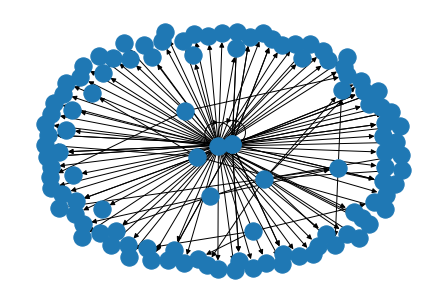

In [24]:
networkInfo(KlNet)
nx.draw(KlNet)

## Zb 

Transcription Factors: 1
Target Genes: 31
Average degree: 1.9375
Internal average degree: 0.96875
External average degree: 0.96875
Clustering coefficient: 0.0
0.03125
Average Path Length (highest value): 0.03125


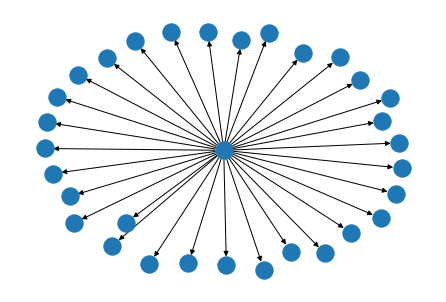

In [127]:
networkInfo(ZbNet)
nx.draw(ZbNet)

## Km

Transcription Factors: 1
Target Genes: 3
Average degree: 1.5
Internal average degree: 0.75
External average degree: 0.75
Clustering coefficient: 0.0
0.25
Average Path Length (highest value): 0.25


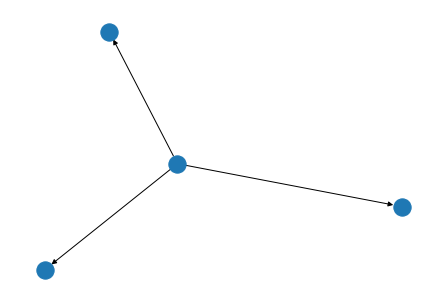

In [128]:
networkInfo(KmNet)
nx.draw(KmNet)

In [35]:
start_time = time.time()
ScLouvain = algorithms.louvain(ScNet)
t = time.time() - start_time
print("Execution time for Louvain in Sc net: %.6s seconds" % (t))

Execution time for Louvain in Sc net: 5.6030 seconds


In [36]:
nComs = list(ScLouvain.to_node_community_map().values())[-1][0]+1
size = evaluation.size(ScNet, ScLouvain)
ad = evaluation.avg_distance(ScNet, ScLouvain)
aid = evaluation.average_internal_degree(ScNet, ScLouvain)
ae = evaluation.avg_embeddedness(ScNet, ScLouvain)
at = evaluation.avg_transitivity(ScNet, ScLouvain)

print("Louvain Number of communities:", nComs)
print("Louvain Average Community Size:", size)
print("Louvain Average Path Length:",  ad)
print("Louvain Average Internal Degree:",  aid)
print("Louvain Average Embeddedness:",  ae)
print("Louvain Average Transitivity:",  at)

Louvain Number of communities: 5
Louvain Average Community Size: FitnessResult(min=579, max=3048, score=1377.2, std=923.1076643599056)
Louvain Average Path Length: FitnessResult(min=2.0135975347245827, max=2.1953141198424215, score=2.12883525481501, std=0.08180586281766668)
Louvain Average Internal Degree: FitnessResult(min=6.020725388601036, max=29.51129607609988, score=20.964590652448614, std=7.991491437746241)
Louvain Average Embeddedness: FitnessResult(min=0.2816411093271152, max=0.5678679053108328, score=0.40353711912785456, std=0.09635480905777478)
Louvain Average Transitivity: FitnessResult(min=0.12868704318503868, max=0.958021458523492, score=0.49391106326886, std=0.2957764416340295)


In [37]:
louvainMod = evaluation.newman_girvan_modularity(ScNet, ScLouvain)
print("Louvain modularity:", louvainMod)

Louvain modularity: FitnessResult(min=None, max=None, score=0.14816744070747248, std=None)


In [39]:
start_time = time.time()
ScLeiden = algorithms.leiden(ScNet)
t = time.time() - start_time
print("Execution time for Leiden in Sc net: %.6s seconds" % (t))

Execution time for Leiden in Sc net: 0.6922 seconds


In [40]:
nComs = list(ScLeiden.to_node_community_map().values())[-1][0]+1
size = evaluation.size(ScNet, ScLeiden)
ad = evaluation.avg_distance(ScNet, ScLeiden)
aid = evaluation.average_internal_degree(ScNet, ScLeiden)
ae = evaluation.avg_embeddedness(ScNet, ScLeiden)
at = evaluation.avg_transitivity(ScNet, ScLeiden)

print("Leiden Number of communities:", nComs)
print("Leiden Average Community Size:", size)
print("Leiden Average Path Length:",  ad)
print("Leiden Average Internal Degree:",  aid)
print("Leiden Average Embeddedness:",  ae)
print("Leiden Average Transitivity:",  at)

Leiden Number of communities: 5
Leiden Average Community Size: FitnessResult(min=407, max=3114, score=1377.2, std=920.7465232082062)
Leiden Average Path Length: FitnessResult(min=1.9964854121393267, max=2.0605645645645647, score=2.0318076171320345, std=0.023283279275117984)
Leiden Average Internal Degree: FitnessResult(min=3.8525798525798525, max=35.90588235294118, score=20.45146952102253, std=10.686149758912993)
Leiden Average Embeddedness: FitnessResult(min=0.28395106911897905, max=0.5626348016300408, score=0.4119723431718634, std=0.09359468848644217)
Leiden Average Transitivity: FitnessResult(min=0.2615943234870326, max=0.9545409884540537, score=0.5660325572118051, std=0.2531898815127051)


In [41]:
leidenMod = evaluation.newman_girvan_modularity(ScNet, ScLeiden)
print("Louvain modularity:", leidenMod)

Louvain modularity: FitnessResult(min=None, max=None, score=0.14774056579137687, std=None)
